# *FARADAY ROTATION* | Lab-Session #7
## Apr-1-2021 13:45

Here we perform the analysis of all the measurements

In [1]:
# Import the relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as consts
from tqdm import tqdm
import os
from csvlib import *
from scipy.optimize import curve_fit

# Display mpl in notebook format
%matplotlib inline

# Data Collection

In [35]:
# First we pick a data set using a folder name
directory = 'AC_VERDET_ROD'     # Directory of the data

# Returns a data frame for the measurements of that particular angle
def get_angle(angle,directory=directory):
    angle = int(angle)
    data = pd.read_csv(directory+'/Angle-%d.csv'%angle)

    return data.to_numpy().T

# Get the raw data for voltage and amplitude
def get_voltage_vs_amplitude(directory=directory):
    data = pd.read_csv(directory+'/Voltage-Amplitude.csv'%angle)
    return data.to_numpy().T

# Returns average and standard deviation
def get_stats(data):
    return np.mean(data), np.std(data)

# Returns a calculated data set with mean and stds for a set of angles
def voltage_vs_angle(angles=np.linspace(0,360,360,dtype=int),directory=directory):
    V = []
    V_std = []
    for angle in tqdm(angles):
        data = get_angle(angle,directory=directory)
        mean,std = get_stats(data[5])

        V.append(mean)
        V_std.append(std)

    return V,V_std,angles

# Plot a voltage VS amplitude graph
def plot_VA(agnles=np.linspace(0,360,360,dtype=int),directory=directory):
    V,V_std,angles = voltage_vs_angle(directory=directory)

    fig = plt.figure(figsize=(13,10))
    ax = fig.add_subplot(111)
    ax.errorbar(angles,V,yerr=V_std,color='deepskyblue')

    return fig,ax

# Plot the lock in at a particular angle
def plot_lock_in(angle,directory=directory):
    data    = get_angle(angle,directory=directory)
    time    = data[2]
    lock_in = data[3]

    fig = plt.figure(figsize=(13,10))
    ax = fig.add_subplot(111)
    ax.plot(time,lock_in,color='mediumseagreen')

    return fig,ax


100%|██████████| 360/360 [00:00<00:00, 360.26it/s]


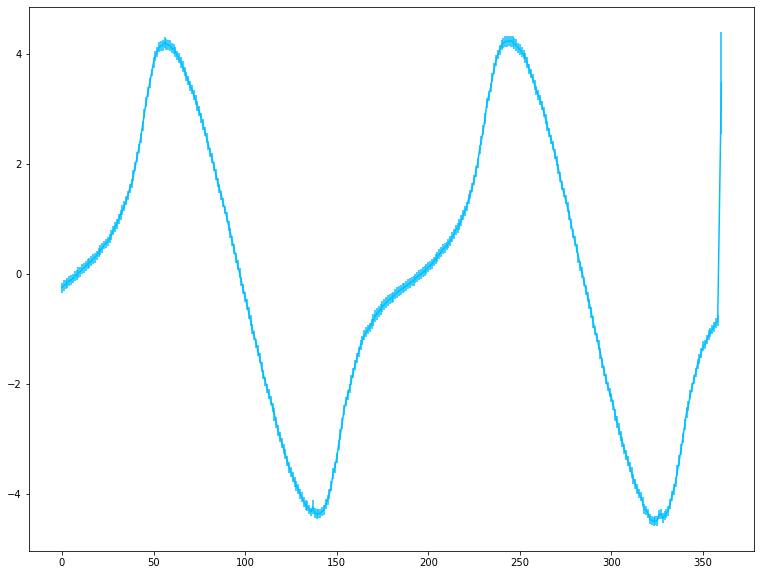

In [33]:
plot_VA();

100%|██████████| 360/360 [00:01<00:00, 334.68it/s]


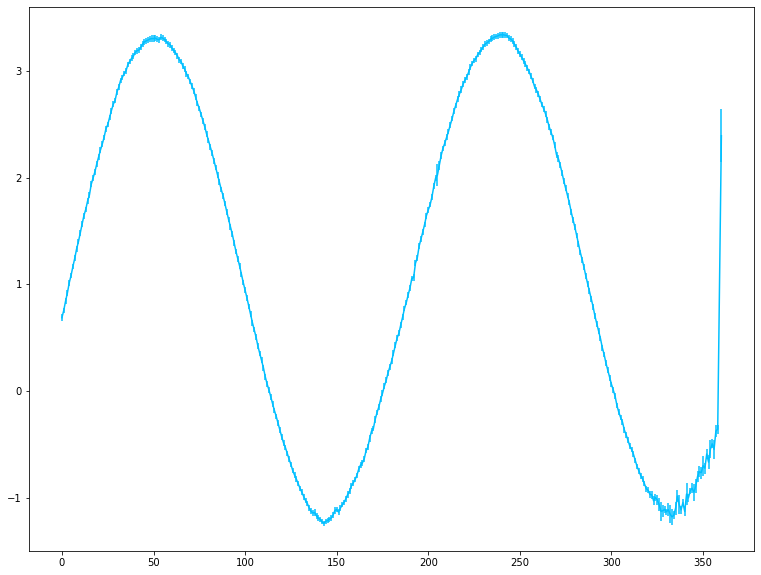

In [30]:
plot_VA(directory='AC_VERDET_ROD_LPF');

(<Figure size 936x720 with 1 Axes>, <AxesSubplot:>)

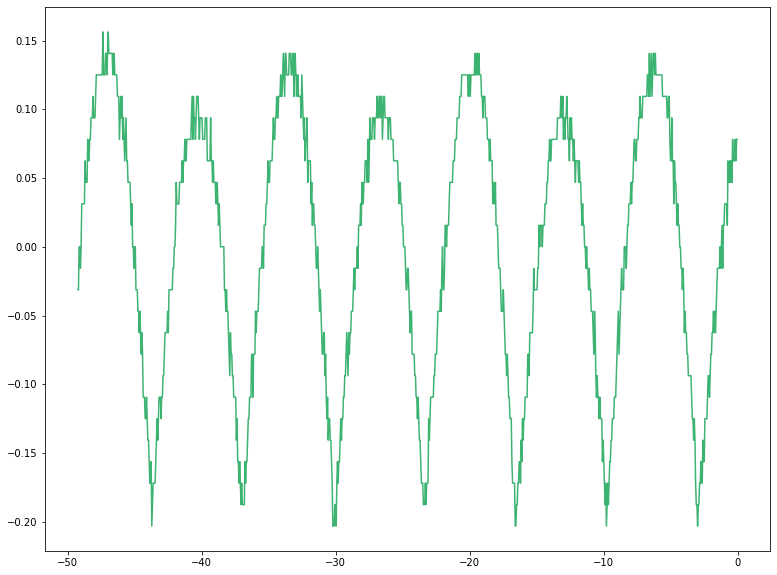

In [46]:
plot_lock_in(200)